In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

Using TensorFlow backend.


In [2]:
model = VGG16(weights='imagenet', include_top=True)
model.layers.pop()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
for l in model.layers:
    l.trainable =False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:


from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam

new_layer = Dense(8, activation='softmax', name='my_dense')

inp = model.input
out = new_layer(model.layers[-1].output)

model2 = Model(inp, out)
model2.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model2.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=15, 
        width_shift_range=0.1,                         
        height_shift_range=0.1, 
        zoom_range=0.1, 
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/valid',
        target_size=(224, 224),
        batch_size=8,
        class_mode='categorical')

Found 3276 images belonging to 8 classes.
Found 500 images belonging to 8 classes.


In [6]:
model2.fit_generator(
        train_generator,
        steps_per_epoch=160,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=40)

Epoch 1/5
160/160 [==============================] - 134s - loss: 1.5506 - acc: 0.4801 - val_loss: 1.6442 - val_acc: 0.4125
Epoch 2/5
160/160 [==============================] - 116s - loss: 1.3948 - acc: 0.5338 - val_loss: 1.2960 - val_acc: 0.5759
Epoch 3/5
160/160 [==============================] - 118s - loss: 1.3022 - acc: 0.5475 - val_loss: 1.2602 - val_acc: 0.5601
Epoch 4/5
160/160 [==============================] - 116s - loss: 1.2418 - acc: 0.5610 - val_loss: 1.3311 - val_acc: 0.5719
Epoch 5/5
160/160 [==============================] - 117s - loss: 1.2177 - acc: 0.5665 - val_loss: 1.1690 - val_acc: 0.5813


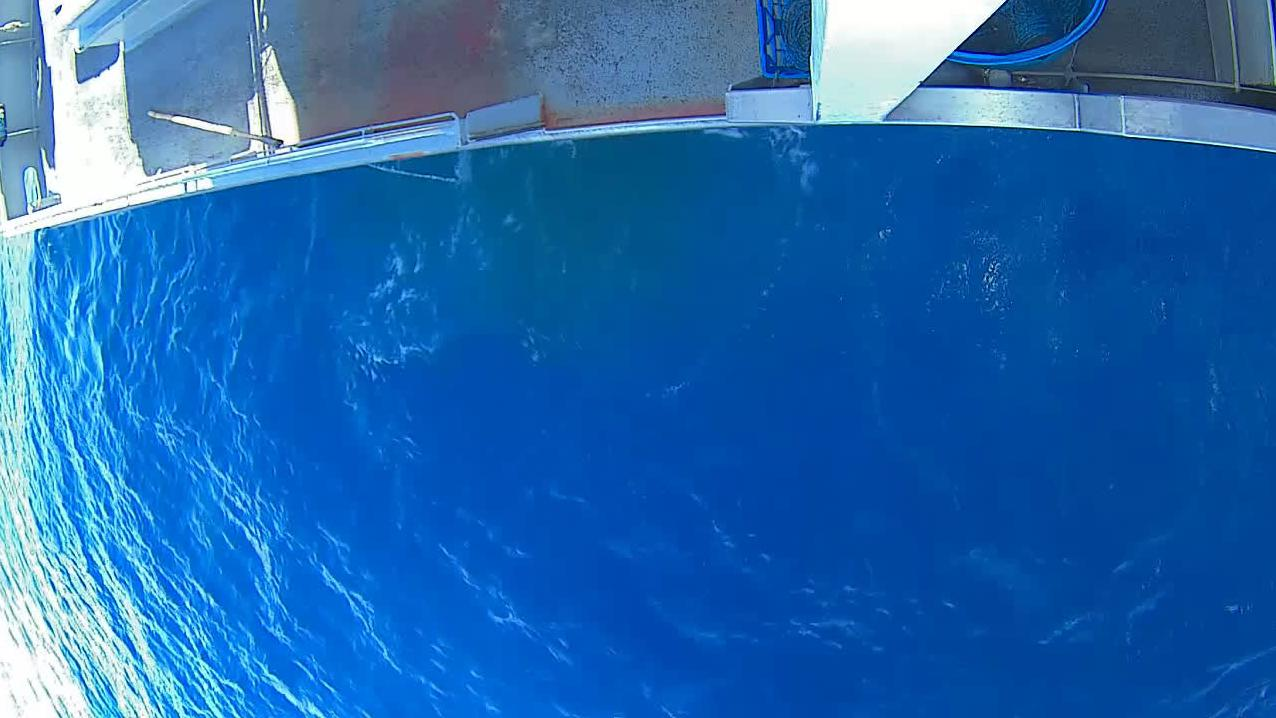

In [23]:

import glob
from IPython.display import display, Image
from keras.preprocessing import image as kimage
import skimage.io
             
img_dir = '/home/ubuntu/data/test_stg1/unknown'
rand_img = np.random.choice(glob.glob(img_dir + '/*.jpg'))
Image(filename=rand_img)

In [12]:
real_test_gen = test_datagen.flow_from_directory(
        '/home/ubuntu/data/test_stg1',
        target_size=(224, 224),
        batch_size=10,
        shuffle=False,
        class_mode=None)

Found 999 images belonging to 1 classes.


In [13]:
# predict 
# batch size infuences speed not accuracy
#
test_pred_all = model2.predict_generator(real_test_gen,1250, verbose=1)
files = np.array([real_test_gen.filenames]).T
all_preds = np.hstack((np.round(test_pred_all,decimals=3), files))

1250/1250 [==============================] - 307s   


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
test_pred_all
test_pred_all.shape